In [ ]:
!pip install torch torchaudio transformers datasets pandas scikit-learn

In [ ]:
!pip uninstall yellowbrick
!pip uninstall umap-learn
!pip install yellowbrick
!pip install umap-learn

Found existing installation: yellowbrick 1.5
Uninstalling yellowbrick-1.5:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/yellowbrick-1.5.dist-info/*
    /usr/local/lib/python3.10/dist-packages/yellowbrick/*
Proceed (Y/n)? Y
  Successfully uninstalled yellowbrick-1.5
Found existing installation: umap-learn 0.5.5
Uninstalling umap-learn-0.5.5:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/umap/*
    /usr/local/lib/python3.10/dist-packages/umap_learn-0.5.5.dist-info/*
Proceed (Y/n)? Y
  Successfully uninstalled umap-learn-0.5.5
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached umap_learn-0.5.5-py3-none-any.whl


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import sklearn
import numpy as np
from yellowbrick.text import UMAPVisualizer
from sklearn.cluster import MiniBatchKMeans, Birch, AgglomerativeClustering

In [ ]:
def get_array(d: dict) -> np.array:
    embeddings = list(d.values())
    embeddings_numpy = [i.numpy() for i in embeddings]
    embeddings_array = np.vstack(embeddings_numpy)
    return embeddings_array

In [ ]:
# upload embeddings
train_set = get_array(torch.load('/content/drive/MyDrive/sberdevices_golos_embeddings/train.pt'))
test_set = get_array(torch.load('/content/drive/MyDrive/sberdevices_golos_embeddings/test.pt'))
val_set = get_array(torch.load('/content/drive/MyDrive/sberdevices_golos_embeddings/validation.pt'))
len(train_set), len(test_set), len(val_set) # (7993, 9994, 793)
X = np.vstack([train_set, test_set, val_set])
X.shape

(18780, 512)

0.0667747


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/yellowbrick/text/umap_vis.py:359: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


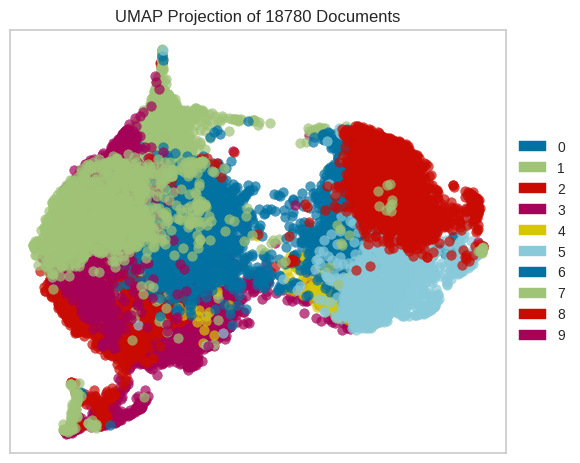

<Axes: title={'center': 'UMAP Projection of 18780 Documents'}>

In [ ]:
# kmeans results
kmeans = MiniBatchKMeans(n_clusters=10,
                         random_state=78,
                         batch_size=5,
                         n_init="auto").fit_predict(X)
labels = kmeans.tolist()
labels = [str(i) for i in labels]
score = sklearn.metrics.silhouette_score(X, labels)
print(score)
umap = UMAPVisualizer(random_state=42)
umap.fit(X, labels)
umap.show()

0.077807784


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/yellowbrick/text/umap_vis.py:359: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


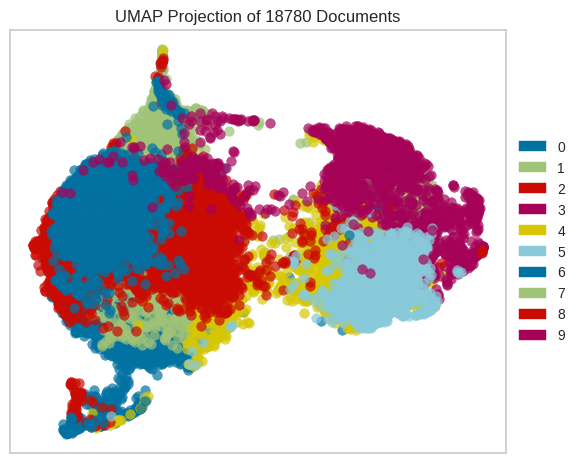

<Axes: title={'center': 'UMAP Projection of 18780 Documents'}>

In [ ]:
# kmeans results
kmeans = MiniBatchKMeans(n_clusters=10,
                         init='random',
                         random_state=78,
                         batch_size=5,
                         n_init="auto").fit_predict(X)
labels = kmeans.tolist()
labels = [str(i) for i in labels]
score = sklearn.metrics.silhouette_score(X, labels)
print(score)
umap = UMAPVisualizer(random_state=42)
umap.fit(X, labels)
umap.show()

0.063863784


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/yellowbrick/text/umap_vis.py:359: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


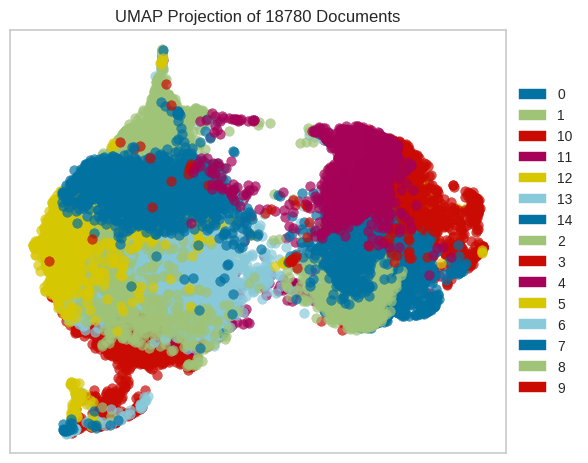

<Axes: title={'center': 'UMAP Projection of 18780 Documents'}>

In [ ]:
# kmeans results
kmeans = MiniBatchKMeans(n_clusters=15,
                         init='random',
                         random_state=78,
                         batch_size=5,
                         n_init="auto").fit_predict(X)
labels = kmeans.tolist()
labels = [str(i) for i in labels]
score = sklearn.metrics.silhouette_score(X, labels)
print(score)
umap = UMAPVisualizer(random_state=42)
umap.fit(X, labels)
umap.show()

0.05661471


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/yellowbrick/text/umap_vis.py:359: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


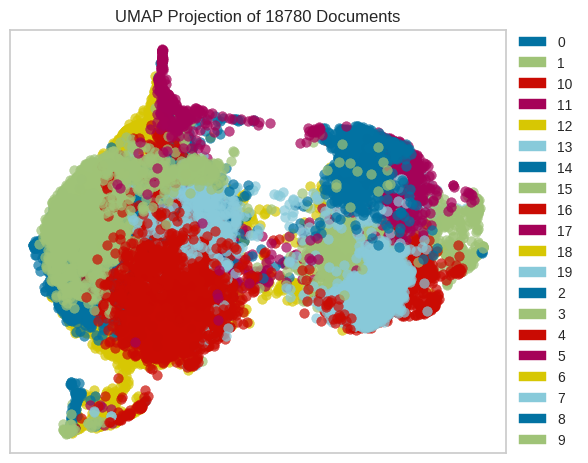

<Axes: title={'center': 'UMAP Projection of 18780 Documents'}>

In [ ]:
# kmeans results
kmeans = MiniBatchKMeans(n_clusters=20,
                         random_state=78,
                         batch_size=5,
                         n_init="auto").fit_predict(X)
labels = kmeans.tolist()
labels = [str(i) for i in labels]
score = sklearn.metrics.silhouette_score(X, labels)
print(score)
umap = UMAPVisualizer(random_state=42)
umap.fit(X, labels)
umap.show()

0.027112028


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/yellowbrick/text/umap_vis.py:359: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


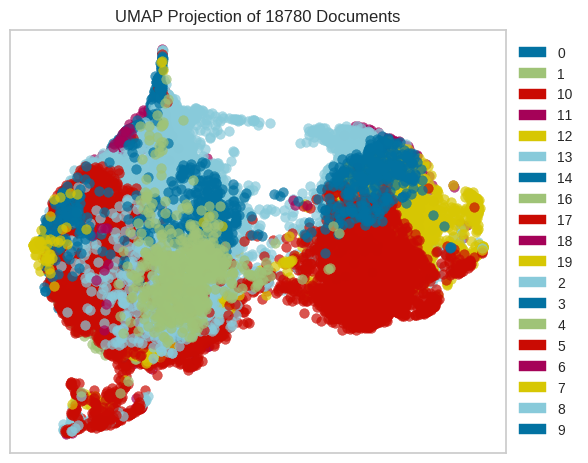

<Axes: title={'center': 'UMAP Projection of 18780 Documents'}>

In [ ]:
# kmeans results
kmeans = MiniBatchKMeans(n_clusters=20,
                         init='random',
                         random_state=78,
                         batch_size=5,
                         n_init="auto").fit_predict(X)
labels = kmeans.tolist()
labels = [str(i) for i in labels]
score = sklearn.metrics.silhouette_score(X, labels)
print(score)
umap = UMAPVisualizer(random_state=42)
umap.fit(X, labels)
umap.show()

0.055484843


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/yellowbrick/text/umap_vis.py:359: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


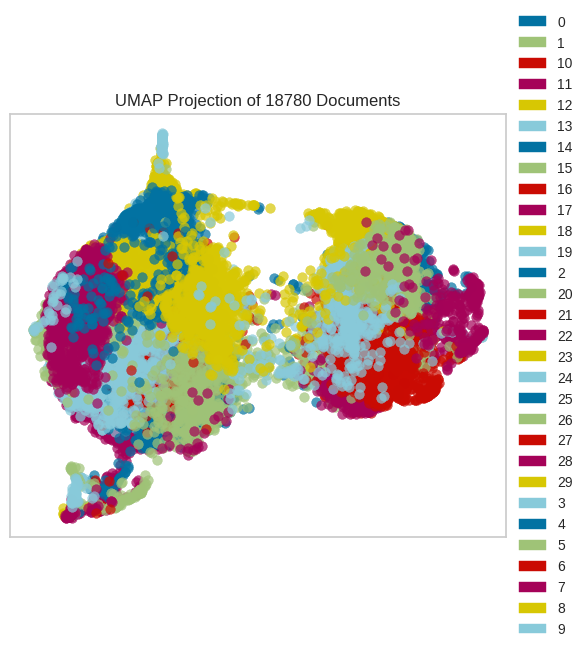

<Axes: title={'center': 'UMAP Projection of 18780 Documents'}>

In [ ]:
# kmeans results
kmeans = MiniBatchKMeans(n_clusters=30,
                         random_state=78,
                         batch_size=5,
                         n_init="auto").fit_predict(X)
labels = kmeans.tolist()
labels = [str(i) for i in labels]
score = sklearn.metrics.silhouette_score(X, labels)
print(score)
umap = UMAPVisualizer(random_state=42)
umap.fit(X, labels)
umap.show()

0.028863916


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/yellowbrick/text/umap_vis.py:359: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


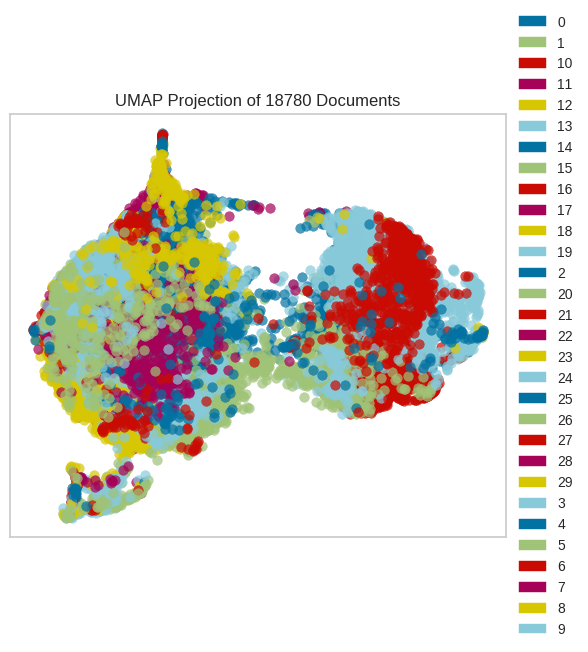

<Axes: title={'center': 'UMAP Projection of 18780 Documents'}>

In [ ]:
# kmeans results
kmeans = MiniBatchKMeans(n_clusters=30,
                         random_state=78,
                         init='random',
                         batch_size=5,
                         n_init="auto").fit_predict(X)
labels = kmeans.tolist()
labels = [str(i) for i in labels]
score = sklearn.metrics.silhouette_score(X, labels)
print(score)
umap = UMAPVisualizer(random_state=42)
umap.fit(X, labels)
umap.show()

0.008495201


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/yellowbrick/text/umap_vis.py:359: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


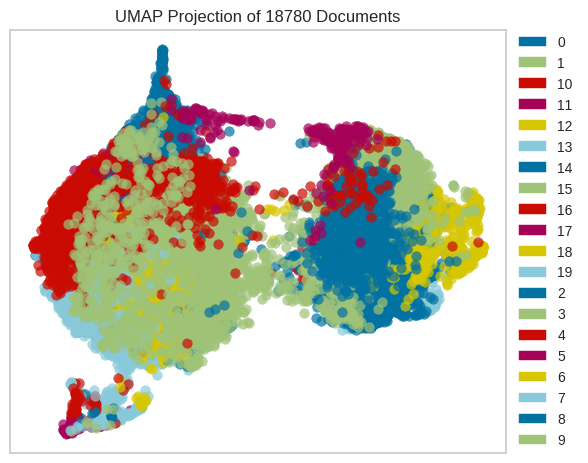

<Axes: title={'center': 'UMAP Projection of 18780 Documents'}>

In [ ]:
# birch results
birch = Birch(n_clusters=20,
               threshold=0.1).fit_predict(X)
labels = [str(i) for i in birch]
score = sklearn.metrics.silhouette_score(X, labels)
print(score)
umap = UMAPVisualizer(random_state=42)
umap.fit(X, labels)
umap.show()

0.02344898


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/yellowbrick/text/umap_vis.py:359: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


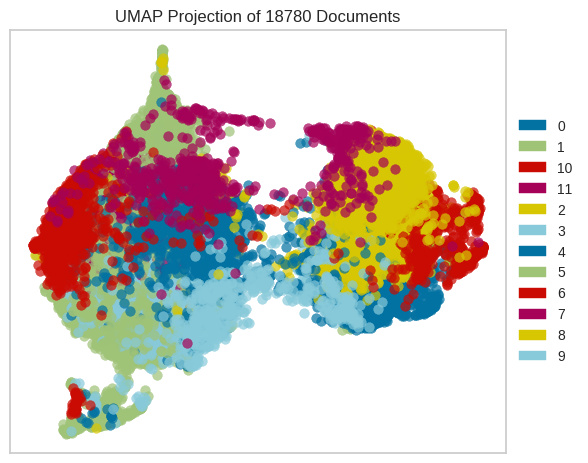

<Axes: title={'center': 'UMAP Projection of 18780 Documents'}>

In [ ]:
# birch results
birch = Birch(n_clusters=12,
               threshold=0.1).fit_predict(X)
labels = [str(i) for i in birch]
score = sklearn.metrics.silhouette_score(X, labels)
print(score)
umap = UMAPVisualizer(random_state=42)
umap.fit(X, labels)
umap.show()

0.13818143


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/yellowbrick/text/umap_vis.py:359: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


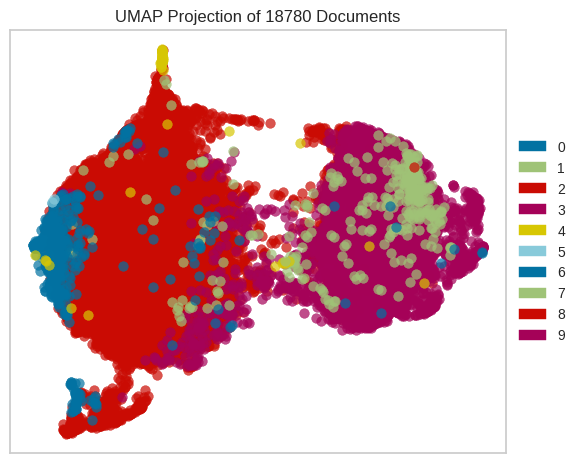

<Axes: title={'center': 'UMAP Projection of 18780 Documents'}>

In [ ]:
# birch results
birch = Birch(n_clusters=10,
               threshold=0.44).fit_predict(X)
labels = [str(i) for i in birch]
score = sklearn.metrics.silhouette_score(X, labels)
print(score)
umap = UMAPVisualizer(random_state=42)
umap.fit(X, labels)
umap.show()

In [ ]:
int_labels = [i for i in birch]
import pickle
with open('/content/drive/MyDrive/list_of_labels', 'wb') as fp:
    pickle.dump(int_labels, fp)

0.15172948


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/yellowbrick/text/umap_vis.py:359: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


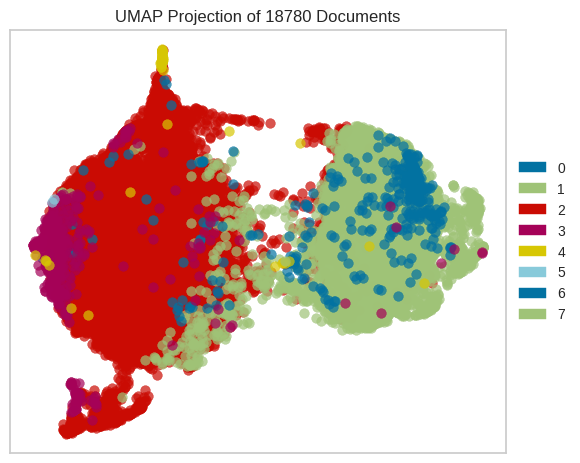

<Axes: title={'center': 'UMAP Projection of 18780 Documents'}>

In [ ]:
# birch results
birch = Birch(n_clusters=8,
               threshold=0.44).fit_predict(X)
labels = [str(i) for i in birch]
score = sklearn.metrics.silhouette_score(X, labels)
print(score)
umap = UMAPVisualizer(random_state=42)
umap.fit(X, labels)
umap.show()

0.15228929


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/yellowbrick/text/umap_vis.py:359: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


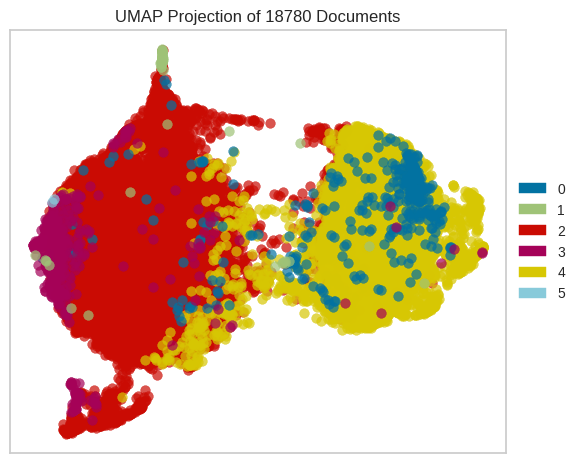

<Axes: title={'center': 'UMAP Projection of 18780 Documents'}>

In [ ]:
# birch results
birch = Birch(n_clusters=6,
               threshold=0.44).fit_predict(X)
labels = [str(i) for i in birch]
score = sklearn.metrics.silhouette_score(X, labels)
print(score)
umap = UMAPVisualizer(random_state=42)
umap.fit(X, labels)
umap.show()

0.3553841


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/yellowbrick/text/umap_vis.py:359: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


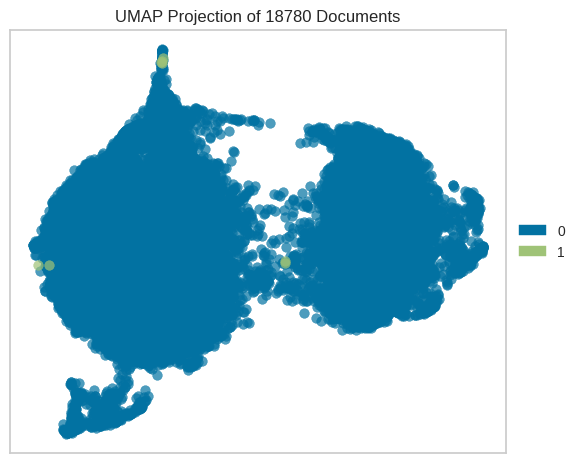

<Axes: title={'center': 'UMAP Projection of 18780 Documents'}>

In [ ]:
# AgglomerativeClustering
ag = AgglomerativeClustering(metric='cosine',linkage='average').fit_predict(X)
labels = [str(i) for i in ag]
score = sklearn.metrics.silhouette_score(X, labels)
print(score)
umap = UMAPVisualizer(random_state=42)
umap.fit(X, labels)
umap.show()